<a href="https://colab.research.google.com/github/rafilaksamana/regression_linear/blob/main/Regression_Linearipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/house.csv")

In [4]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Membuat Boxplot dengan Maksimal Kuantil 95

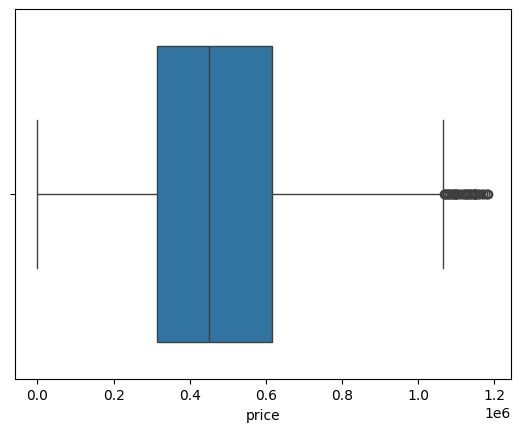

In [7]:
q = data["price"].quantile(0.95)
data_filtered = data[data["price"]<q]
ax = sns.boxplot(x = data_filtered["price"])

Melihat Harga Rumah dengan Jumlah Kamar Tidur

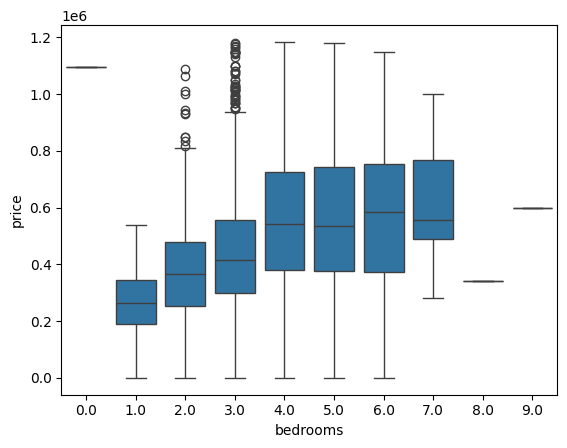

In [8]:
ax =sns.boxplot (x="bedrooms",y="price", data=data_filtered)

Memilih Feature yang akan Digunakan untuk Memprediksi Harga

In [9]:
selected_features =["sqft_living","sqft_above","bathrooms","view","sqft_basement","bedrooms","floors","waterfront"]
selected_data = data[selected_features]
selected_data.head()

,sqft_living,sqft_above,bathrooms,view,sqft_basement,bedrooms,floors,waterfront
0,1340,1340,1.50,0,0,3.0,1.5,0
1,3650,3370,2.50,4,280,5.0,2.0,0
2,1930,1930,2.00,0,0,3.0,1.0,0
3,2000,1000,2.25,0,1000,3.0,1.0,0
4,1940,1140,2.50,0,800,4.0,1.0,0


In [10]:
selected_data["price"] = data["price"]
selected_data.head()

<ipython-input-10-79e410621dfe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data["price"] = data["price"]


,sqft_living,sqft_above,bathrooms,view,sqft_basement,bedrooms,floors,waterfront,price
0,1340,1340,1.50,0,0,3.0,1.5,0,313000.0
1,3650,3370,2.50,4,280,5.0,2.0,0,2384000.0
2,1930,1930,2.00,0,0,3.0,1.0,0,342000.0
3,2000,1000,2.25,0,1000,3.0,1.0,0,420000.0
4,1940,1140,2.50,0,800,4.0,1.0,0,550000.0


In [11]:
selected_data.shape

(4600, 9)

Membuang Outlier

In [12]:
q = selected_data["price"].quantile(0.75)
filtered_data = selected_data[(selected_data['price']<q)& (selected_data['price']>0)].copy()
filtered_data.head()

,sqft_living,sqft_above,bathrooms,view,sqft_basement,bedrooms,floors,waterfront,price
0,1340,1340,1.50,0,0,3.0,1.5,0,313000.0
2,1930,1930,2.00,0,0,3.0,1.0,0,342000.0
3,2000,1000,2.25,0,1000,3.0,1.0,0,420000.0
4,1940,1140,2.50,0,800,4.0,1.0,0,550000.0
5,880,880,1.00,0,0,2.0,1.0,0,490000.0


In [13]:
filtered_data.shape

(3401, 9)

Melakukan Data Normalisasi (Feature Scalling)

In [14]:
x= filtered_data[selected_features]
y= filtered_data['price']
x.head()

,sqft_living,sqft_above,bathrooms,view,sqft_basement,bedrooms,floors,waterfront
0,1340,1340,1.50,0,0,3.0,1.5,0
2,1930,1930,2.00,0,0,3.0,1.0,0
3,2000,1000,2.25,0,1000,3.0,1.0,0
4,1940,1140,2.50,0,800,4.0,1.0,0
5,880,880,1.00,0,0,2.0,1.0,0


In [15]:
x = filtered_data [selected_features].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaler = min_max_scaler.fit_transform(x)

Merubah Kembali ke Dataframe

In [16]:
normalized_data = pd.DataFrame(x_scaler,columns=selected_features)
normalized_data.head()

,sqft_living,sqft_above,bathrooms,view,sqft_basement,bedrooms,floors,waterfront
0,0.173524,0.216518,0.15,0.0,0.000000,0.250,0.2,0.0
1,0.279070,0.348214,0.25,0.0,0.000000,0.250,0.0,0.0
2,0.291592,0.140625,0.30,0.0,0.473934,0.250,0.0,0.0
3,0.280859,0.171875,0.35,0.0,0.379147,0.375,0.0,0.0
4,0.091234,0.113839,0.05,0.0,0.000000,0.125,0.0,0.0


Membagi Features dan Target Variables

In [17]:
x = normalized_data.values

y = filtered_data ["price"].values

x

array([[0.17352415, 0.21651786, 0.15      , ..., 0.25      , 0.2       ,
        0.        ],
       [0.27906977, 0.34821429, 0.25      , ..., 0.25      , 0.        ,
        0.        ],
       [0.29159213, 0.140625  , 0.3       , ..., 0.25      , 0.        ,
        0.        ],
       ...,
       [0.47227191, 0.58928571, 0.35      , ..., 0.25      , 0.4       ,
        0.        ],
       [0.30769231, 0.15625   , 0.25      , ..., 0.375     , 0.        ,
        0.        ],
       [0.20035778, 0.25      , 0.35      , ..., 0.25      , 0.4       ,
        0.        ]])

In [18]:
y

array([313000.      , 342000.      , 420000.      , ..., 416904.166667,
       203400.      , 220600.      ])

Melakukan Modelling dan Evaluasi dengan Linear Regression

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2020)

m = len (x)
m_train = len (x_train)
m_test = len(x_test)

print("======================")
print("Total Data =" +str(m))
print("Train Data =" +str(m_train))
print("Test Data=" +str(m_test))

Total Data =3401
Train Data =2720
Test Data=681


Model Development

In [20]:
from sklearn.linear_model import LinearRegression
lin_req = LinearRegression()
lin_req.fit (x_train, y_train)

LinearRegression()

Model Evaluation

In [21]:
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import numpy as np

y_pred = lin_req.predict(x_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
r, _ = pearsonr(y_pred, y_test)

print("=== Evaluation Regression Linear ===")
print("Root Mean Squared Error (RMSE) =" +str(rmse))
print("Pearson's Correlation Coefficient =" +str(r))

=== Evaluation Regression Linear ===
Root Mean Squared Error (RMSE) =118165.13454166612
Pearson's Correlation Coefficient =0.5080318086878991


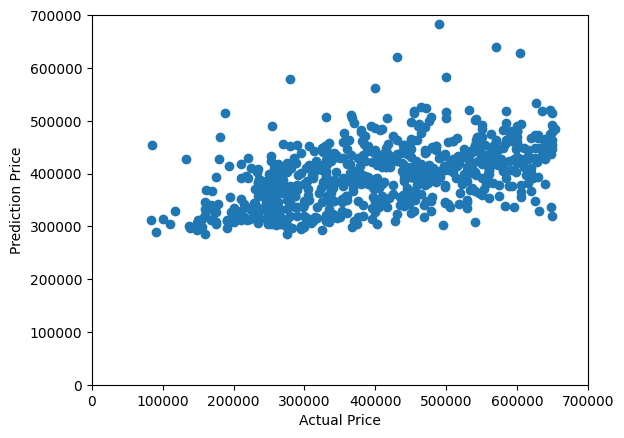

In [22]:
from matplotlib import pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")
plt.axis([0,700000,0,700000])
plt.show()

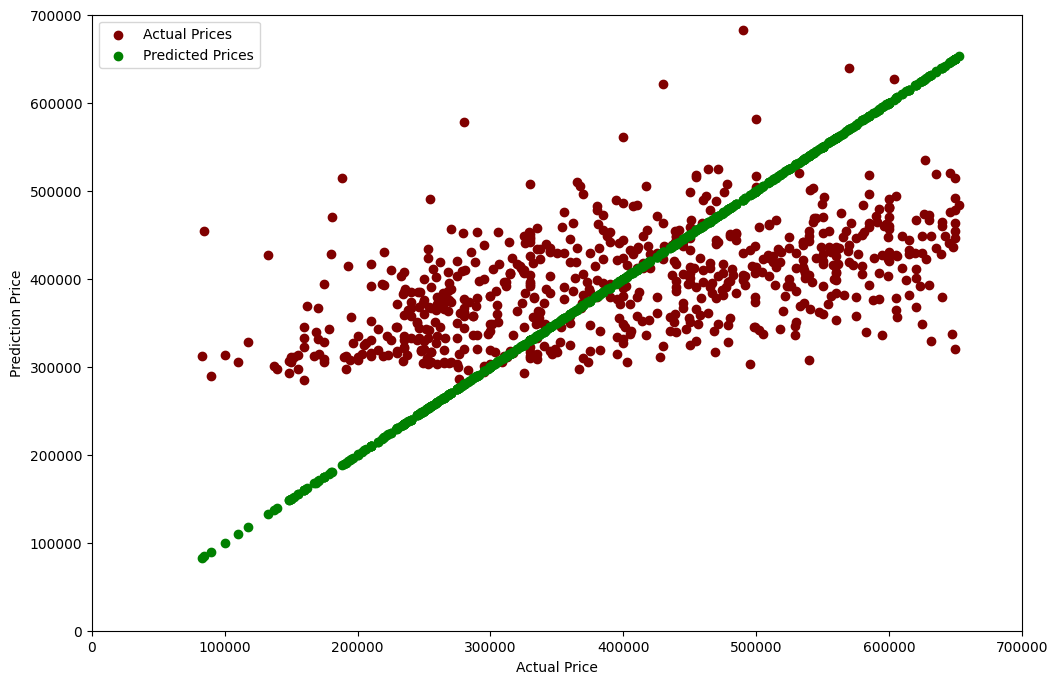

In [23]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 8))

plt.scatter(y_test, y_pred, color='maroon', label='Actual Prices')
plt.scatter(y_test, y_test, color='green', label='Predicted Prices')

plt.xlabel('Actual Price')
plt.ylabel('Prediction Price')
plt.axis([0, 700000, 0, 700000])
plt.legend()
plt.show()

Melakukan Modeling dan Evaluasi Dengan Neural Networks

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state = 2020)

m = len (x)
m_train = len(x_train)
m_test = len(x_test)

print("========")
print("Total data = " +str(m))
print("Train data = " +str(m_train))
print("Test data=" +str(m_test))

Total data = 3401
Train data = 2720
Test data=681


Model Development Neural Network

In [25]:
from sklearn.neural_network import MLPRegressor
NN_reg = MLPRegressor (max_iter = 5000, hidden_layer_sizes = (200, 2), learning_rate_init = 0.1, random_state = 2020)

NN_reg.fit(x_train, y_train)

MLPRegressor(hidden_layer_sizes=(200, 2), learning_rate_init=0.1, max_iter=5000,
             random_state=2020)

Model Evaluation

In [26]:
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import numpy as np

y_pred = NN_reg.predict(x_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
r,_= pearsonr (y_pred, y_test)

print("=======")
print("Root mean squared error (RMSE) =" +str(rmse))
print("Pearsons correlation coefficient =" + str(r))


Root mean squared error (RMSE) =118201.34371114906
Pearsons correlation coefficient =0.5080301086252291


Visualization Actual Price vs Predicted Price

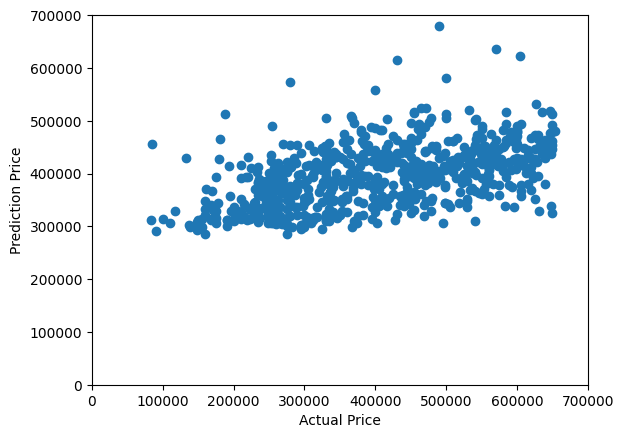

In [27]:
from matplotlib import pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")
plt.axis([0,700000,0,700000])
plt.show()